In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer.feature_names, cancer.feature_names.shape

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'), (30,))

In [6]:
X = cancer.data
y = cancer.target

In [7]:
X.shape, y.shape

((569, 30), (569,))

## Standardization

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0, stratify = y)

In [10]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [11]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))
print('Precision: ', metrics.precision_score(y_test, y_predict))
print('Recall: ', metrics.recall_score(y_test, y_predict))

Accuracy:  0.9532163742690059
Precision:  0.9541284403669725
Recall:  0.9719626168224299


Confusion Matrix


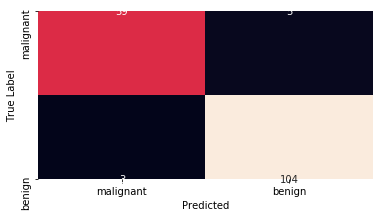

In [12]:
print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=cancer.target_names, yticklabels=cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [13]:
element, count = np.unique(y_test, return_counts = True)
element, count

(array([0, 1]), array([ 64, 107]))

In [14]:
# without scaling of input feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9649122807017544


In [15]:
clf = svm.SVC(kernel='poly', degree=5, gamma=100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [17]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.631578947368421
